In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 

In [3]:
data = pd.read_csv("flight_customer_data.csv")

In [4]:
data.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26


In [5]:
data.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [8]:
data.shape

(62988, 23)

In [9]:
date_list = ['FFP_DATE', 'FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE']

In [12]:
data[date_list] = data[date_list].apply(pd.to_datetime, errors = 'coerce' )

In [21]:
data = data.drop(['MEMBER_NO'],axis=1)

In [22]:
data.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,140,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62988 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 2   GENDER             62985 non-null  object        
 3   FFP_TIER           62988 non-null  int64         
 4   WORK_CITY          60719 non-null  object        
 5   WORK_PROVINCE      59740 non-null  object        
 6   WORK_COUNTRY       62962 non-null  object        
 7   AGE                62568 non-null  float64       
 8   LOAD_TIME          62988 non-null  datetime64[ns]
 9   FLIGHT_COUNT       62988 non-null  int64         
 10  BP_SUM             62988 non-null  int64         
 11  SUM_YR_1           62437 non-null  float64       
 12  SUM_YR_2           62850 non-null  float64       
 13  SEG_KM_SUM         62988 non-null  int64         
 14  LAST_F

In [30]:
data_num = data[['AGE','FLIGHT_COUNT','BP_SUM','SEG_KM_SUM','AVG_INTERVAL','MAX_INTERVAL']]

<Figure size 1000x700 with 0 Axes>

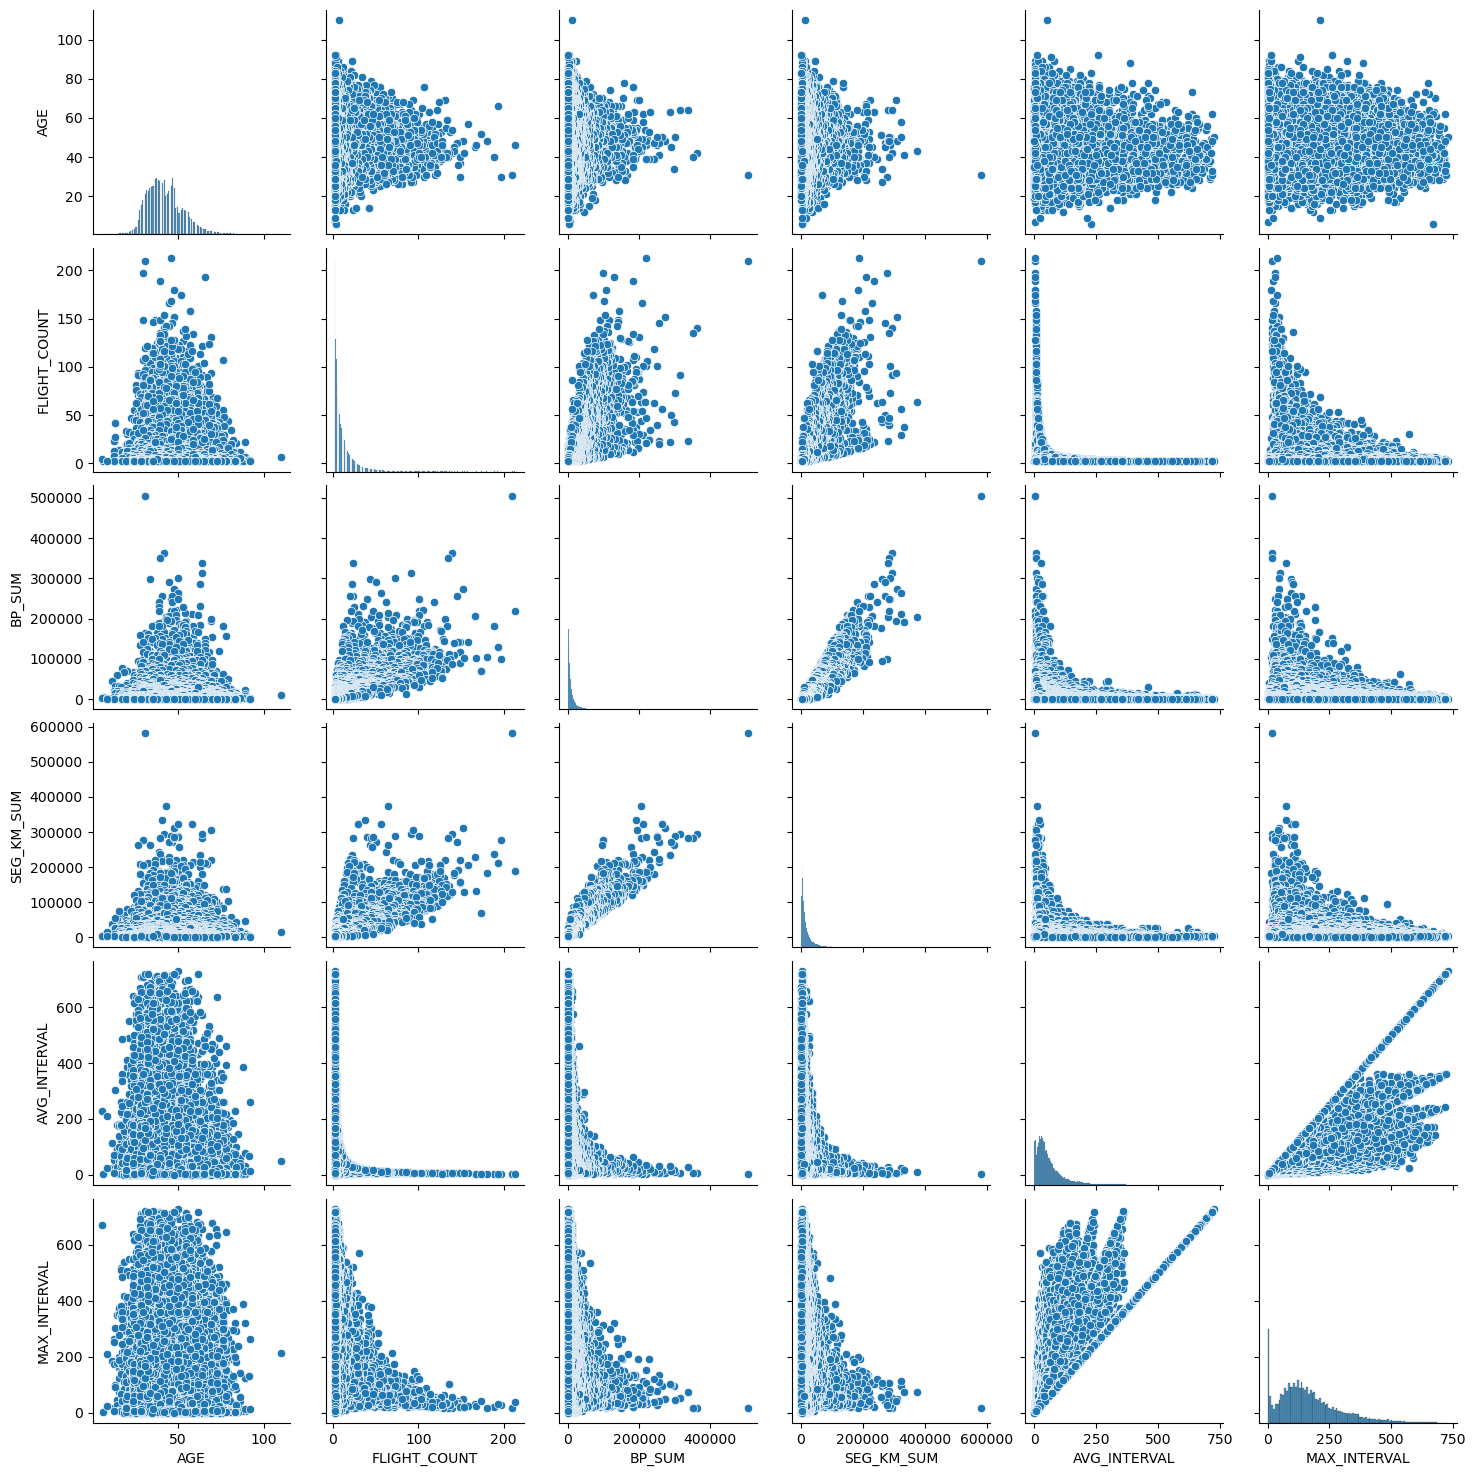

In [44]:
plt.figure(figsize=(10,7))
sns.pairplot(data_num)
plt.show(block= False)

In [34]:
data.select_dtypes(['float64','int64'])

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
1,6,42.0,140,362480,171483.0,167434.0,293678,7,5.194245,17,29,1.252314,415768,33
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,4,25.0,2,0,0.0,0.0,1134,297,4.000000,4,1,0.000000,12318,22
62984,4,38.0,4,0,0.0,0.0,8016,89,37.000000,60,14,0.000000,106972,43
62985,4,43.0,2,0,0.0,0.0,2594,29,166.000000,166,0,0.000000,0,0
62986,4,36.0,2,0,0.0,0.0,3934,400,12.000000,12,0,0.000000,0,0


In [51]:
null_perc = data.isna().mean()*100

In [62]:
null_perc_df = pd.DataFrame({"columns " : null_perc.index , "Perc" : null_perc.values})
null_perc_df.sort_values(by='Perc', ascending= False)

,columns,Perc
5,WORK_PROVINCE,5.156538
4,WORK_CITY,3.602273
11,SUM_YR_1,0.874770
14,LAST_FLIGHT_DATE,0.668381
7,AGE,0.666794
12,SUM_YR_2,0.219089
6,WORK_COUNTRY,0.041278
2,GENDER,0.004763
20,Points_Sum,0.000000
19,avg_discount,0.000000


In [63]:
data.dropna(inplace=True)

In [68]:
null_perc = data.isna().mean()*100
null_perc_df = pd.DataFrame({"columns " : null_perc.index , "Perc" : null_perc.values})
null_perc_df.sort_values(by='Perc', ascending= False)

,columns,Perc
0,FFP_DATE,0.0
1,FIRST_FLIGHT_DATE,0.0
20,Points_Sum,0.0
19,avg_discount,0.0
18,EXCHANGE_COUNT,0.0
17,MAX_INTERVAL,0.0
16,AVG_INTERVAL,0.0
15,LAST_TO_END,0.0
14,LAST_FLIGHT_DATE,0.0
13,SEG_KM_SUM,0.0


In [70]:
# Finding spar
col_with_0 = []
for i in data.columns:
    perc_zero = (data[i] == 0).mean()*100
    col_with_0.append((i,perc_zero))

In [73]:
pd.DataFrame(col_with_0, columns=['columns' , 'perc']).sort_values(by='perc', ascending=False)

,columns,perc
18,EXCHANGE_COUNT,85.826132
21,Point_NotFlight,66.723125
12,SUM_YR_2,18.036640
11,SUM_YR_1,15.585897
10,BP_SUM,0.848600
17,MAX_INTERVAL,0.644660
16,AVG_INTERVAL,0.644660
20,Points_Sum,0.625648
19,avg_discount,0.012098
4,WORK_CITY,0.000000


In [75]:
data.drop(['EXCHANGE_COUNT', 'Point_NotFlight'] , axis=1, inplace=True)

In [78]:
data

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,Points_Sum
0,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,210,505308,239560.0,234188.0,580717,2014-03-31,1,3.483254,18,0.961639,619760
2,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,135,351159,163618.0,164982.0,283712,2014-03-21,11,5.298507,18,1.254676,406361
3,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,23,337314,116350.0,125500.0,281336,2013-12-26,97,27.863636,73,1.090870,372204
4,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,152,273844,124560.0,130702.0,309928,2014-03-27,5,4.788079,47,0.970658,338813
5,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,92,313338,112364.0,76946.0,294585,2014-01-13,79,7.043956,52,0.967692,343121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,2,0,0.0,0.0,3848,2013-01-20,437,0.000000,0,0.000000,0
62983,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,2,0,0.0,0.0,1134,2013-06-09,297,4.000000,4,0.000000,12318
62984,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,4,0,0.0,0.0,8016,2014-01-03,89,37.000000,60,0.000000,106972
62985,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,2,0,0.0,0.0,2594,2014-03-03,29,166.000000,166,0.000000,0


In [79]:
data.drop_duplicates(inplace=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57859 entries, 0 to 62986
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           57859 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  57859 non-null  datetime64[ns]
 2   GENDER             57859 non-null  object        
 3   FFP_TIER           57859 non-null  int64         
 4   WORK_CITY          57859 non-null  object        
 5   WORK_PROVINCE      57859 non-null  object        
 6   WORK_COUNTRY       57859 non-null  object        
 7   AGE                57859 non-null  float64       
 8   LOAD_TIME          57859 non-null  datetime64[ns]
 9   FLIGHT_COUNT       57859 non-null  int64         
 10  BP_SUM             57859 non-null  int64         
 11  SUM_YR_1           57859 non-null  float64       
 12  SUM_YR_2           57859 non-null  float64       
 13  SEG_KM_SUM         57859 non-null  int64         
 14  LAST_F

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])

In [88]:
num_col = data.select_dtypes(['int64', 'float64']).columns

In [91]:
num_col

Index(['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'avg_discount', 'Points_Sum'],
      dtype='object')

In [89]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
data[num_col] = ss.fit_transform(data[num_col])

In [90]:
data.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,Points_Sum
0,2006-11-02,2008-12-24,1,5.011377,.,beijing,CN,-1.150556,2014-03-31,13.901988,30.333615,28.875938,26.220898,26.850367,2014-03-31,-0.946902,-0.831668,-1.214200,1.310262,29.437088
2,2007-02-01,2007-08-30,1,5.011377,.,beijing,CN,-0.228742,2014-03-31,8.634935,20.873217,19.512434,18.279651,12.695591,2014-03-21,-0.891592,-0.808255,-1.214200,2.903360,19.088740
3,2008-08-22,2008-08-23,1,2.367314,Los Angeles,CA,US,2.229428,2014-03-31,0.769469,20.023525,13.684379,13.749172,12.582355,2013-12-26,-0.415925,-0.517215,-0.766679,2.012826,17.432366


## Statistical Analysis

In [92]:
corr_data = data.select_dtypes(['float64','int64']).corr()
corr_data

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,Points_Sum
FFP_TIER,1.000000,0.085904,0.588901,0.586409,0.466561,0.615941,0.527333,-0.207711,-0.148934,-0.134858,0.252141,0.561145
AGE,0.085904,1.000000,0.081170,0.108470,0.117878,0.089980,0.094168,-0.030366,-0.028828,0.006994,0.138930,0.081929
FLIGHT_COUNT,0.588901,0.081170,1.000000,0.799043,0.751656,0.801875,0.856774,-0.402295,-0.323214,-0.201132,0.145443,0.752584
BP_SUM,0.586409,0.108470,0.799043,1.000000,0.853582,0.885667,0.922336,-0.320485,-0.255127,-0.160093,0.313779,0.918903
SUM_YR_1,0.466561,0.117878,0.751656,0.853582,1.000000,0.664389,0.805199,-0.188246,-0.245889,-0.149858,0.272439,0.787292
SUM_YR_2,0.615941,0.089980,0.801875,0.885667,0.664389,1.000000,0.851236,-0.424011,-0.253140,-0.165493,0.239139,0.823623
SEG_KM_SUM,0.527333,0.094168,0.856774,0.922336,0.805199,0.851236,1.000000,-0.369479,-0.289128,-0.168365,0.112908,0.849202
LAST_TO_END,-0.207711,-0.030366,-0.402295,-0.320485,-0.188246,-0.424011,-0.369479,1.000000,-0.099784,-0.332350,-0.021679,-0.291299
AVG_INTERVAL,-0.148934,-0.028828,-0.323214,-0.255127,-0.245889,-0.253140,-0.289128,-0.099784,1.000000,0.723878,-0.042373,-0.226769
MAX_INTERVAL,-0.134858,0.006994,-0.201132,-0.160093,-0.149858,-0.165493,-0.168365,-0.332350,0.723878,1.000000,-0.020317,-0.145724


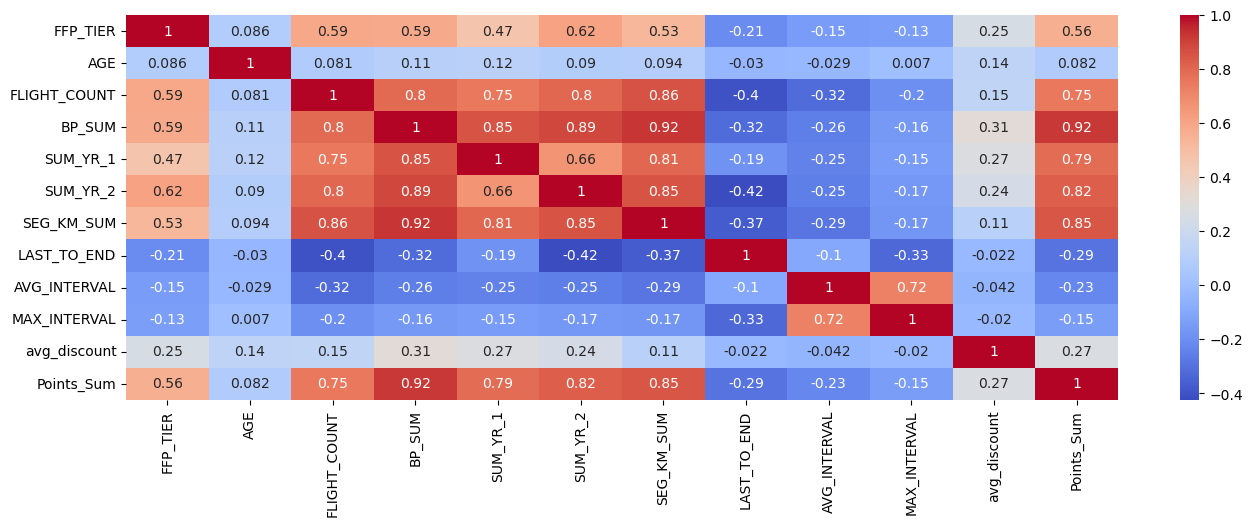

In [93]:
plt.figure(figsize=(16,5))
sns.heatmap(corr_data,annot=True, cmap= 'coolwarm')
plt.show(block=False)

In [105]:
data.drop(['Points_Sum','SUM_YR_1', 'SUM_YR_2','SEG_KM_SUM'],axis=1, inplace= True, errors= 'ignore')

In [108]:
data.columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_CITY',
       'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'FLIGHT_COUNT',
       'BP_SUM', 'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL',
       'MAX_INTERVAL', 'avg_discount'],
      dtype='object')

In [109]:
from scipy import stats
_,p = stats.ttest_ind(data['AGE'], data['FLIGHT_COUNT'])
p

0.9999999999999964

In [110]:
from scipy import stats
_,p = stats.ttest_ind(data['AGE'], data['BP_SUM'])
p

0.9999999999999944

In [112]:
from scipy import stats
_,p = stats.ttest_ind(data['AGE'], data['AVG_INTERVAL'])
p

0.9999999999999952

In [113]:
from scipy import stats
_,p = stats.ttest_ind(data['AGE'], data['MAX_INTERVAL'])
p

0.9999999999999971

In [114]:
from scipy import stats
_,p = stats.ttest_ind(data['AGE'], data['avg_discount'])
p

0.9999999999999982

In [115]:
from scipy import stats
_,p = stats.ttest_ind(data['AGE'], data['GENDER'],)
p

0.0

In [ ]:
# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default
# Deleting avg_discount,MAX_INTERVAL,AVG_INTERVAL,BP_SUM,FLIGHT_COUNT due to p > 0.05

In [119]:
data.drop(['avg_discount','MAX_INTERVAL','AVG_INTERVAL','BP_SUM','FLIGHT_COUNT','WORK_CITY'], axis=1, inplace= True, errors= 'ignore')

In [120]:
data

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,LAST_FLIGHT_DATE,LAST_TO_END
0,2006-11-02,2008-12-24,1,5.011377,beijing,CN,-1.150556,2014-03-31,2014-03-31,-0.946902
2,2007-02-01,2007-08-30,1,5.011377,beijing,CN,-0.228742,2014-03-31,2014-03-21,-0.891592
3,2008-08-22,2008-08-23,1,2.367314,CA,US,2.229428,2014-03-31,2013-12-26,-0.415925
4,2009-04-10,2009-04-15,1,5.011377,guizhou,CN,0.590648,2014-03-31,2014-03-27,-0.924778
5,2008-02-10,2009-09-29,1,5.011377,guangdong,CN,2.229428,2014-03-31,2014-01-13,-0.515483
...,...,...,...,...,...,...,...,...,...,...
62982,2013-01-20,2013-01-20,0,-0.276749,.,CN,-0.740861,2014-03-31,2013-01-20,1.464619
62983,2011-05-20,2013-06-05,0,-0.276749,guangdong,CN,-1.765098,2014-03-31,2013-06-09,0.690277
62984,2010-03-08,2013-09-14,1,-0.276749,guangdong,CN,-0.433590,2014-03-31,2014-01-03,-0.460173
62985,2006-03-30,2006-12-02,0,-0.276749,guangdong,CN,0.078529,2014-03-31,2014-03-03,-0.792034


In [121]:
data.columns

Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'AGE', 'LOAD_TIME', 'LAST_FLIGHT_DATE', 'LAST_TO_END'],
      dtype='object')

In [124]:
df = data[['AGE','GENDER','FFP_TIER','LAST_TO_END']]

In [130]:
df

,AGE,GENDER,FFP_TIER,LAST_TO_END
0,-1.150556,1,5.011377,-0.946902
2,-0.228742,1,5.011377,-0.891592
3,2.229428,1,2.367314,-0.415925
4,0.590648,1,5.011377,-0.924778
5,2.229428,1,5.011377,-0.515483
...,...,...,...,...
62982,-0.740861,0,-0.276749,1.464619
62983,-1.765098,0,-0.276749,0.690277
62984,-0.433590,1,-0.276749,-0.460173
62985,0.078529,0,-0.276749,-0.792034


In [138]:
df.values

array([[-1.15055587,  1.        ,  5.01137696, -0.94690211],
       [-0.22874208,  1.        ,  5.01137696, -0.891592  ],
       [ 2.22942804,  1.        ,  2.36731375, -0.41592501],
       ...,
       [-0.43358959,  1.        , -0.27674946, -0.4601731 ],
       [ 0.07852919,  0.        , -0.27674946, -0.79203379],
       [-0.6384371 ,  0.        , -0.27674946,  1.25997147]])

In [141]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= i)
km.fit(df.values)

C:\Users\nanda\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from sklearn.cluster import KMeans
import numpy as np 
inertias = []

for i in range(2,8):
    km = KMeans(n_clusters= i)
    km.fit(df)
    inertias.append(km.inertia_)

